In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

In [3]:
path = "/content/gdrive/MyDrive/dataset/"


In [4]:
df_users_full = pd.read_csv(path + "users.csv")
df_users1 = df_users_full[["user_id","functional_unit","department"]]
df_users = df_users1[df_users1.functional_unit == "2 - ResearchAndEngineering"]
df_users = df_users[(df_users.department != "1 - Research")]
df_users = pd.DataFrame(df_users)

In [5]:
df_users

,user_id,functional_unit,department
8,HBB0090,2 - ResearchAndEngineering,3 - Engineering
10,QCF0390,2 - ResearchAndEngineering,3 - Engineering
11,JDD0087,2 - ResearchAndEngineering,3 - Engineering
12,AAN0077,2 - ResearchAndEngineering,3 - Engineering
13,GJP0098,2 - ResearchAndEngineering,3 - Engineering
...,...,...,...
17318,KRM0241,2 - ResearchAndEngineering,3 - Engineering
17320,ORC0907,2 - ResearchAndEngineering,2 - SoftwareManagement
17325,REM0274,2 - ResearchAndEngineering,3 - Engineering
17332,QKA0388,2 - ResearchAndEngineering,3 - Engineering


In [6]:
df_users = df_users.dropna(axis = 0)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 8 to 17333
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          3991 non-null   object
 1   functional_unit  3991 non-null   object
 2   department       3991 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [7]:
df_device = pd.read_csv(path + "device.csv")

In [8]:
df_file = pd.read_csv(path + "file.csv")

In [9]:
df_logon = pd.read_csv(path + "logon.csv")

In [10]:
df_psychometric = pd.read_csv(path + "psychometric.csv")
df_psychometric = df_psychometric[['employee_name','user_id','O','C','E', 'A', 'N']]

In [11]:
df_users_clean = df_users.rename(columns= {'user_id':'user'}, inplace=False)

In [12]:
df_logon_users = pd.merge(df_logon, df_users_clean, on = 'user')
df_logon_users_clean = df_logon_users.drop(columns=['functional_unit', 'department'])


In [13]:
df_device_users = pd.merge(df_device, df_users_clean, on='user')
df_device_users_clean = df_device_users.drop(columns=['functional_unit','department'])

In [14]:
df_device_users = pd.merge(df_device, df_users_clean, on = 'user')
df_device_users_clean = df_device_users.drop(columns = ['functional_unit', 'department'])


In [15]:
df_file_users = pd.merge(df_file, df_users_clean, on = 'user')
df_file_users_clean = df_file_users.drop(columns = ['functional_unit', 'department'])


In [16]:
df_psychometric_users = pd.merge(df_psychometric, df_users, on = 'user_id')
df_psychometric_users_clean = df_psychometric_users[['employee_name', 'user_id','O', 'C', 'E','A','N']]


In [17]:
df_logon_users_clean['date'] = pd.to_datetime(df_logon_users_clean['date'])

In [18]:
df_logon_users_clean['time'] = df_logon_users_clean['date'].dt.time

In [19]:
df_user_logon = df_logon_users_clean.loc[df_logon_users_clean['activity'] == 'Logon']

In [20]:
df_user_logon['hour'] = pd.to_datetime(df_user_logon['date'], format='%H:%M').dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_user_logon_stats = df_user_logon.groupby('user')['time'].agg([min,max]).reset_index()

In [22]:
df_logon_mode = df_user_logon.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [23]:
df_logon_mean = df_user_logon.groupby('user')['hour'].mean().reset_index()
df_logon_mean['hour'].dtype
df_logon_mean['hour'] = pd.to_datetime(df_logon_mean['hour'], format='%H').dt.time


In [24]:
df_user_logon_stats['mode'] = df_logon_mode['time']
df_user_logon_stats['mean'] = df_logon_mean['hour']

In [25]:
df_user_logoff = df_logon_users_clean.loc[df_logon_users_clean['activity'] == 'Logoff']

In [26]:
df_user_logoff['date'] = pd.to_datetime(df_user_logoff['date'])
df_user_logoff['time'] = df_user_logoff['date'].dt.time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:

df_user_logoff['hour'] = pd.to_datetime(df_user_logoff['date'], format='%H:%M').dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df_user_logoff_stats = df_user_logoff.groupby('user')['time'].agg([min,max]).reset_index()

In [29]:
df_user_logoff.groupby('user')['time'].agg(pd.Series.mode).reset_index()

,user,time
0,AAN0077,16:56:00
1,AAW0103,16:14:00
2,ACE0265,16:06:00
3,ACL0394,17:15:00
4,ADR0362,16:45:00
...,...,...
225,XTM0246,17:00:00
226,YJT0368,16:45:00
227,YSB0779,16:45:00
228,ZBL0379,19:30:00


In [30]:
df_logoff_mode = df_user_logoff.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [31]:
df_logoff_mean = df_user_logoff.groupby('user')['hour'].mean().reset_index()
df_logoff_mean['hour'] = df_logoff_mean['hour'].astype(int)
df_logoff_mean['hour'] = pd.to_datetime(df_logoff_mean['hour'], format='%H').dt.time


In [32]:
df_user_logoff_stats['mode'] = df_logoff_mode['time']
df_user_logoff_stats['mean'] = df_logoff_mean['hour']

In [33]:
df_device_users_clean['time'] = pd.to_datetime(df_device_users_clean['date']).dt.time

In [34]:
df_device_conn = df_device_users_clean.loc[df_device_users_clean['activity'] == 'Connect']
df_device_disconn = df_device_users_clean.loc[df_device_users_clean['activity'] == 'Disconnect']


In [35]:
df_device_conn_stats = df_device_conn.groupby('user')['time'].agg([min, max]).reset_index()

In [36]:
df_device_conn_stats_1 = df_device_conn.groupby('user')

In [37]:
df_conn_mode = df_device_conn.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [38]:
df_device_conn['hour'] = pd.to_datetime(df_device_conn['date']).dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_conn_mean = df_device_conn.groupby('user')['hour'].mean().reset_index()
df_conn_mean['hour'] = df_conn_mean['hour'].astype(int)
df_conn_mean['hour'] = pd.to_datetime(df_conn_mean['hour'],format="%H").dt.time

In [40]:
df_device_conn_stats['mode'] = df_conn_mode['time']
df_device_conn_stats['mean'] = df_conn_mean['hour']

In [41]:
df_device_disconn_stats = df_device_disconn.groupby('user')['time'].agg([min,max]).reset_index()

In [42]:
df_dconn_mode = df_device_disconn.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()



In [43]:
df_device_disconn['hour'] = pd.to_datetime(df_device_disconn['date']).dt.hour


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_dconn_mean = df_device_disconn.groupby('user')['hour'].mean().reset_index()
df_dconn_mean['hour'] = df_dconn_mean['hour'].astype(int)
df_dconn_mean['hour'] = pd.to_datetime(df_dconn_mean['hour'], format='%H').dt.time


In [45]:
df_dconn_mean

,user,hour
0,AJQ0376,14:00:00
1,AJR0231,11:00:00
2,AOD0066,12:00:00
3,ARH0777,12:00:00
4,BCP0247,12:00:00
5,BDS0396,13:00:00
6,BMS0057,15:00:00
7,BZK0095,11:00:00
8,CAE0080,12:00:00
9,CGH0088,12:00:00


In [46]:
df_device_disconn_stats['mode'] = df_dconn_mode['time']
df_device_disconn_stats['mean'] = df_dconn_mean['hour']

In [ ]:
df_file_users_clean['date2'] = pd.to_datetime(df_file_users_clean['date']).dt.date

In [ ]:
df_files_per_day = df_file_users_clean.groupby(['user', 'date2']).size().reset_index()

In [ ]:
df_files_per_day.rename(columns={0:'transfers_per_day'}, inplace=True)


In [ ]:
df_files_max_per_day = df_files_per_day.groupby('user')['transfers_per_day'].agg(max).reset_index()
df_files_max_per_day.rename(columns={'transfers_per_day': "max_transfers_per_user"}, inplace=True)

In [ ]:
df_files_mode_per_day = df_files_per_day.groupby('user')['transfers_per_day'].agg(lambda x: x.value_counts().index[0]).reset_index()
df_files_mode_per_day.rename(columns={'transfers_per_day': "mode_transfers_per_user"}, inplace=True)


In [ ]:
df_files_mode_per_day

In [ ]:
df_files_stats = df_files_mode_per_day

In [ ]:
df_files_stats_new = pd.DataFrame()
df_files_stats_new['user'] = df_files_stats['user']
df_files_stats_new['mode_trasfers_per_user'] = df_files_stats['mode_transfers_per_user']
df_files_stats_new['max_transfers_per_user'] = df_files_max_per_day['max_transfers_per_user']


In [ ]:
df_user_pc = df_logon_users_clean.groupby(['user','pc',]).agg(pc_visits_per_user_total = pd.NamedAgg(column = 'pc', aggfunc = 'count')).reset_index()
df_user_pc['count'] = df_user_pc.groupby(['user'])['pc'].transform('nunique')
df_user_pc = df_user_pc.drop(['pc', 'pc_visits_per_user_total'], axis=1)
df_user_pc = df_user_pc.drop_duplicates()

In [ ]:
df_user_pc

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
df_user_pc_count = np.array(df_user_pc['count'])

In [ ]:
df_user_pc_ct = df_user_pc_count.reshape(-1,1)

In [ ]:
df_user_pc.columns

In [ ]:
#user pc
forest = IsolationForest(bootstrap=False, contamination=0.1,max_features=1.0,
                         max_samples='auto',n_estimators=100, n_jobs=1, random_state=None,
                         verbose=0)
forest.fit(df_user_pc_ct)


In [ ]:
import pickle 
with open('user_pc_ct.pkl','wb') as file :
  pickle.dump(forest, file)

In [ ]:
graph_a_score = forest.decision_function(df_user_pc_ct)
print(graph_a_score[1:10])

In [ ]:
graph_result = pd.DataFrame()
graph_result['user'] = df_user_pc['user']
graph_result['ascore'] = graph_a_score
graph_result.to_csv('user_pc_ct.csv')
print(graph_result)

In [ ]:
outliers = graph_result.loc[graph_result['ascore'] < 0]
print(outliers)

In [ ]:
def dtt2timestamp(dtt):
  time_in_sec = (dtt.hour*60 + dtt.minute) * 60 + dtt.second
  return time_in_sec

In [ ]:
df_user_logon_stats_sec = df_user_logon_stats


In [ ]:
min_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['min']]
max_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['max']]
mode_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['mode']]
mean_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['mean']]

In [ ]:
df_user_logon_stats_sec['min_ts'] = min_ts
df_user_logon_stats_sec['max_ts'] = max_ts
df_user_logon_stats_sec['mode_ts'] = mode_ts
df_user_logon_stats_sec['mean_ts'] = mean_ts

In [ ]:
df_user_logon_stats_sec.drop(['min','max','mode','mean'], axis=1)

In [ ]:
df_user_logoff_stats_sec = df_user_logoff_stats


In [ ]:
min_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['min']] 
max_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['max']]
mode_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['mode']]
mean_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['mean']]

In [ ]:
df_user_logoff_stats_sec['min_ts'] = min_ts
df_user_logoff_stats_sec['max_ts'] = max_ts
df_user_logoff_stats_sec['mode_ts'] = mode_ts
df_user_logoff_stats_sec['mean_ts'] = mean_ts

In [ ]:
df_user_logoff_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

In [ ]:
df_log_on_off_stats = pd.DataFrame()

df_log_on_off_stats['user'] = df_user_logon_stats_sec['user']
df_log_on_off_stats['on_min_ts'] = df_user_logon_stats_sec['min_ts']
df_log_on_off_stats['on_max_ts'] = df_user_logon_stats_sec['max_ts']
df_log_on_off_stats['on_mode_ts'] = df_user_logon_stats_sec['mode_ts']
df_log_on_off_stats['on_mean_ts'] = df_user_logon_stats_sec['mean_ts']
df_log_on_off_stats['off_min_ts'] = df_user_logon_stats_sec['min_ts']
df_log_on_off_stats['off_max_ts'] = df_user_logon_stats_sec['max_ts']
df_log_on_off_stats['off_mode_ts'] = df_user_logon_stats_sec['mode_ts']
df_log_on_off_stats['off_mean_ts'] = df_user_logon_stats_sec['mean_ts']

In [ ]:
df_log_on_off_stats.dtypes

In [ ]:
log_stats = df_log_on_off_stats.drop(['user'], axis = 1)
log_stats_matrix = np.matrix(log_stats)
print(log_stats_matrix)

In [ ]:
df_log_on_off_stats.columns

In [ ]:
#logon
forest = IsolationForest(bootstrap=False, contamination= 0.1 , max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=0,
        verbose=0)
forest.fit(log_stats_matrix)
log_ascore = forest.decision_function(log_stats_matrix)
log_ascore[:10]

In [ ]:
# counting the values
df22 = pd.Series(forest.predict(log_stats_matrix))
df22 = df22.map({1:0, -1:1})
print(df22.value_counts())

In [ ]:
import pickle 
with open('log_stats_matrix.pkl','wb') as file :
  pickle.dump(forest, file)

In [ ]:
df_user_log_result = pd.DataFrame()
df_user_log_result['user'] = df_user_logoff_stats_sec['user']
df_user_log_result['ascore'] = log_ascore
df_user_log_result.to_csv('user_log_result.csv')
print(df_user_log_result)


In [ ]:
df_user_log_result.loc[df_user_log_result['ascore'] < 0]

In [ ]:
df_device_conn_stats_sec = df_device_conn_stats
con_min_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['min']]
con_max_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['max']]
con_mode_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['mode']]
con_mean_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['mean']]

df_device_conn_stats_sec['min_ts'] = con_min_ts
df_device_conn_stats_sec['max_ts'] = con_max_ts
df_device_conn_stats_sec['mode_ts'] = con_mode_ts
df_device_conn_stats_sec['mean_ts'] = con_mean_ts
df_device_conn_stats_sec = df_device_conn_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

In [ ]:
df_device_disconn_stats_sec = df_device_conn_stats
discon_min_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['min']]
discon_max_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['max']]
discon_mode_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['mode']]
discon_mean_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['mean']]

df_device_disconn_stats_sec['min_ts'] = discon_min_ts
df_device_disconn_stats_sec['max_ts'] = discon_max_ts
df_device_disconn_stats_sec['mode_ts'] = discon_mode_ts
df_device_disconn_stats_sec['mean_ts'] = discon_mean_ts
df_device_disconn_stats_sec = df_device_disconn_stats_sec.drop(['min', 'max','mode','mean'], axis=1)


In [ ]:
df_device_full = pd.DataFrame()
df_device_full['user'] = df_device_conn_stats['user']

In [ ]:
df_device_full['con_min_ts'] = df_device_conn_stats_sec['min_ts']
df_device_full['con_max_ts'] = df_device_conn_stats_sec['max_ts']
df_device_full['con_mode_ts'] = df_device_conn_stats_sec['mode_ts']
df_device_full['con_mean_ts'] = df_device_conn_stats_sec['mean_ts']

# disconnect stats
df_device_full['dcon_min_ts'] = df_device_disconn_stats_sec['min_ts']
df_device_full['dcon_max_ts'] = df_device_disconn_stats_sec['max_ts']
df_device_full['dcon_mode_ts'] = df_device_disconn_stats_sec['mode_ts']
df_device_full['dcon_mean_ts'] = df_device_disconn_stats_sec['mean_ts']

# files per day stats
df_device_full['file_mode'] = df_files_stats_new['mode_trasfers_per_user']
df_device_full['file_max'] = df_files_stats_new['max_transfers_per_user']

In [ ]:
device_full_matrix = df_device_full.drop(['user'],axis=1)
device_params = np.matrix(device_full_matrix)
device_params[:10]

In [ ]:
df_device_full.columns

In [ ]:
# device (-user)
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(device_params)


In [ ]:
import pickle 
with open('device_params.pkl','wb') as file :
  pickle.dump(forest, file)

In [ ]:

dev_file_ascore = forest.decision_function(device_params)
print(dev_file_ascore)

In [ ]:
df_device_file_full_result = pd.DataFrame()

df_device_file_full_result['user'] = df_device_full['user']
df_device_file_full_result['ascore'] = dev_file_ascore
df_device_file_full_result.to_csv('device_file_full_result.csv')

In [ ]:
df_device_file_full_result.loc[df_device_file_full_result['ascore'] < 0] 

In [ ]:
psychometric_matrix = df_psychometric_users_clean.drop(['user_id', 'employee_name'], axis = 1)
psychometric_params = np.matrix(psychometric_matrix)

In [ ]:
# psycho ds 
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(psychometric_params)

In [ ]:
import pickle 
with open('psychometric_params.pkl','wb') as file :
  pickle.dump(forest, file)

In [ ]:
psych_ascore = forest.decision_function(psychometric_params)
psych_ascore[:10]

In [ ]:
df_psychometric_result = pd.DataFrame()

df_psychometric_result['user'] = df_psychometric_users_clean['user_id']
df_psychometric_result['ascore'] = psych_ascore
df_psychometric_result.to_csv('psychometric_result.csv')

In [ ]:
df_psychometric_result.loc[df_psychometric_result['ascore'] < 0]

In [ ]:
df = pd.merge(df_log_on_off_stats, df_user_pc, on='user')

In [ ]:
df_1 = pd.merge(df, df_psychometric, left_on = 'user', right_on = 'user_id')

In [ ]:
df_1.head()

In [ ]:
df_final = df_1.drop(['employee_name', 'user_id'], axis=1)


In [ ]:
df_all_parameters = df_final

In [ ]:
df_all_parameters_input = df_all_parameters.drop(['user'], axis = 1)

In [ ]:
print(df_all_parameters_input)

In [ ]:
# psycho logon ds
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(df_all_parameters_input)

In [ ]:
import pickle 
with open('all_parameters_input.pkl','wb') as file :
  pickle.dump(forest, file)

In [ ]:
all_parameters_ascore = forest.decision_function(df_all_parameters_input)
print(all_parameters_ascore[:10])

In [ ]:
df_all_parameters_result = pd.DataFrame()

df_all_parameters_result['user'] = df_final['user']
df_all_parameters_result['ascore'] = all_parameters_ascore
print(df_all_parameters_result)
df_all_parameters_result.to_csv('all_parameters_result.csv')

In [ ]:
df_all_parameters_result.loc[df_all_parameters_result['ascore'] < 0]

In [ ]:
df_user_log_result.head()

In [ ]:
df_user_log_result.hist()

In [ ]:
df_device_file_full_result.head()

In [ ]:
# df_device_file_full_result.hist(bins = 15)
df_device_file_full_result.hist()

In [ ]:
df_psychometric_result.head()

In [ ]:
df_psychometric_result.hist()

In [ ]:
df_all_parameters_result.head()

In [ ]:
df_all_parameters_result.hist()

In [ ]:
df_all_parameters_result.loc[df_all_parameters_result['ascore'] < 0].hist()

In [ ]:
df_threat_users_all_params = df_all_parameters_result.loc[df_all_parameters_result['ascore'] < -0.065]
print(df_threat_users_all_params)

In [ ]:
df_all_parameters[df_all_parameters.user.isin(df_threat_users_all_params.user)]

In [ ]:
df_device_file_full_result.head()

In [ ]:
df_device_file_full_result.loc[df_device_file_full_result['ascore'] < 0].hist()

In [ ]:
df_threat_users_device_file = df_device_file_full_result.loc[df_device_file_full_result['ascore'] <= 0]
print(df_threat_users_device_file)


In [ ]:
df_device_full[df_device_full.user.isin(df_threat_users_device_file.user)]

In [ ]:
df_user_log_result.head()
df_user_log_result.loc[df_user_log_result['ascore'] < 0].hist()

In [ ]:
df_threat_users_log = df_user_log_result.loc[df_user_log_result['ascore'] <= -0.04]
print(df_threat_users_log)

In [ ]:
df_log_on_off_stats[df_log_on_off_stats.user.isin(df_threat_users_log.user)]

In [ ]:
df_psychometric_result.head()

In [ ]:
df_psychometric_result.loc[df_psychometric_result['ascore'] < 0].hist()

In [ ]:
df_threat_psycho = df_psychometric_result.loc[df_psychometric_result['ascore'] <= -0.04]


In [ ]:
df_psychometric_users_clean[df_psychometric_users_clean.user_id.isin(df_threat_psycho.user)]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

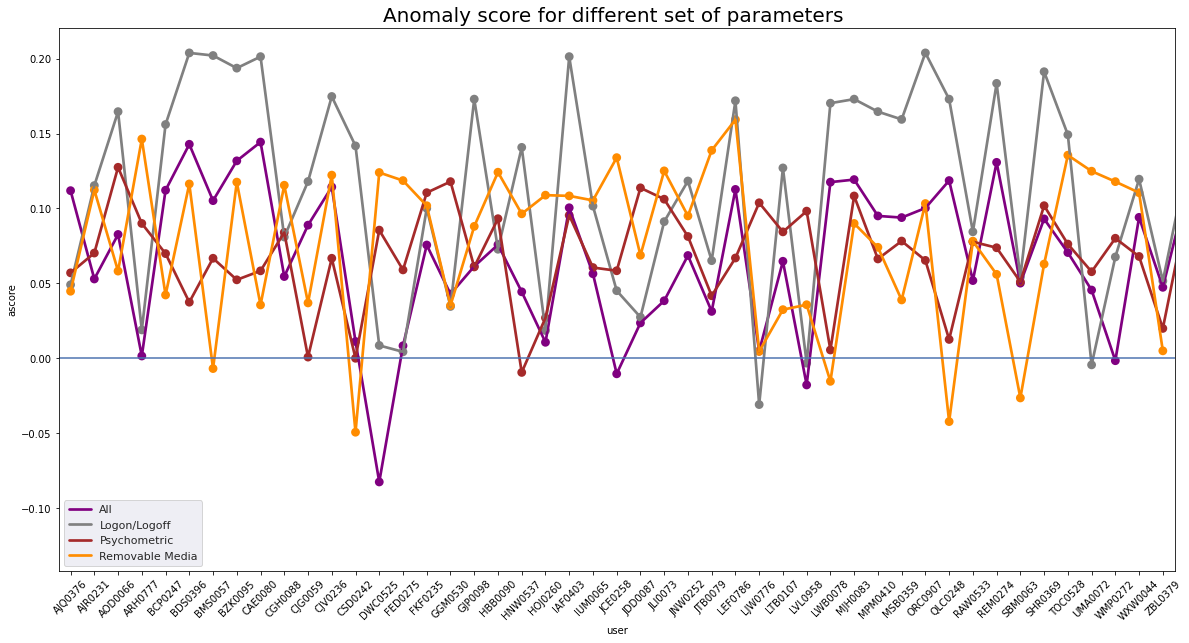

In [ ]:
f, ax = plt.subplots(figsize = (20,10))
x_col='user'
y_col = 'ascore'
sns.set_theme(style="darkgrid")
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_all_parameters_result,color='purple')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_user_log_result,color='grey')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_psychometric_result,color='brown')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_device_file_full_result,color='darkorange')

ax.legend(handles=ax.lines[::len(df_all_parameters_result)+1], labels=["All","Logon/Logoff","Psychometric","Removable Media"])
#ax.set_xtickslabels(rotation = 45)
ax.axhline(0, ls='-')
ax.set_title('Anomaly score for different set of parameters ', size = 20)
plt.rcParams["axes.labelsize"] = 25
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [ ]:
df_files_stats_new.to_csv('file_stats_new')     #CHARTJS

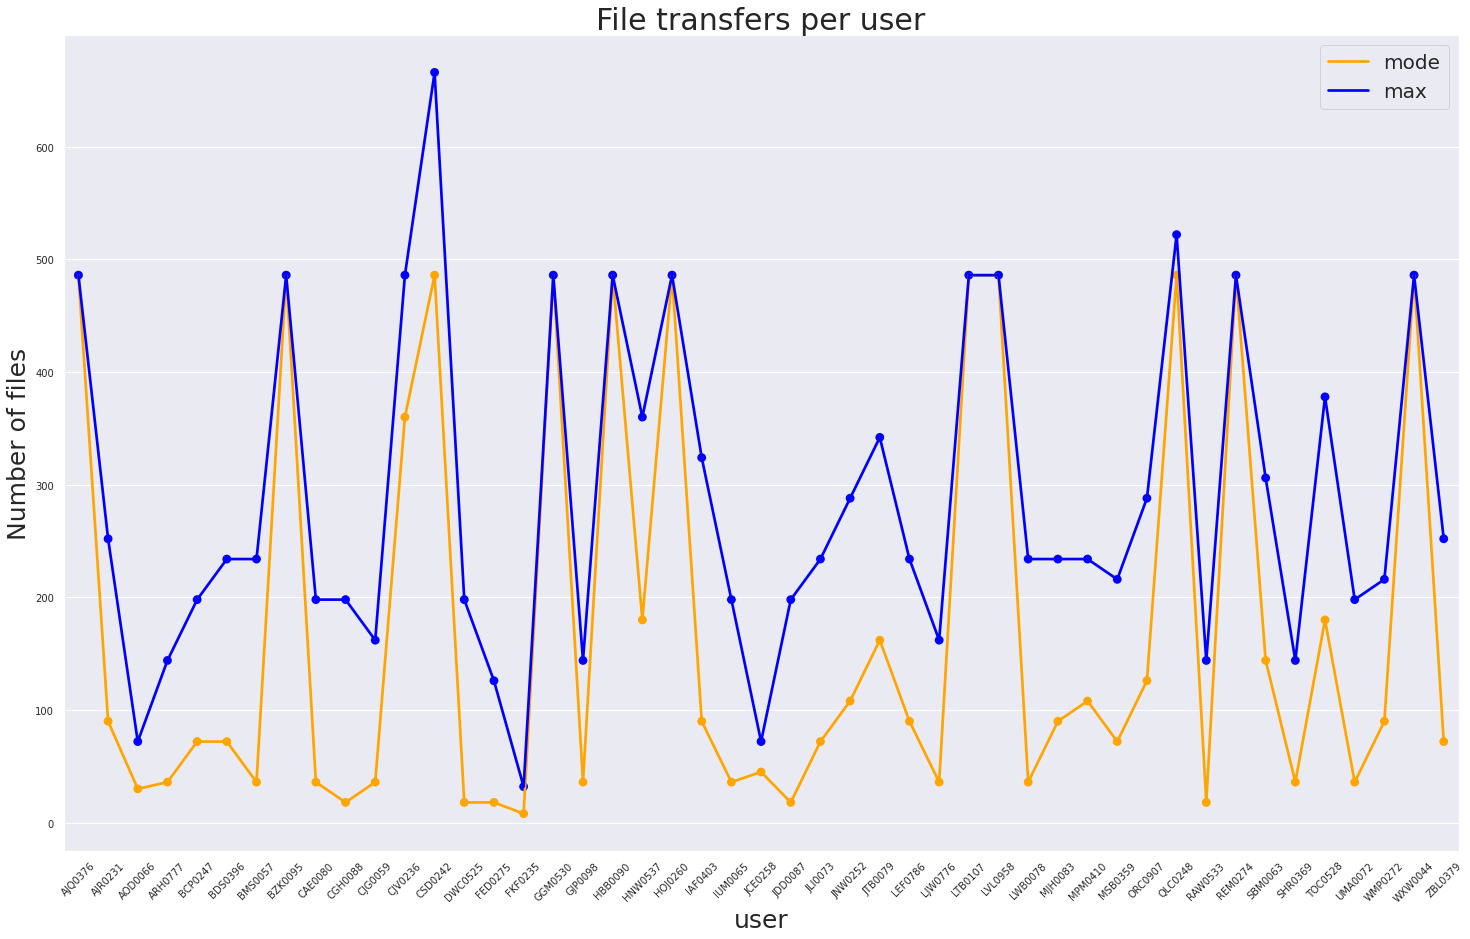

In [ ]:
f, ax = plt.subplots(figsize = (25,15))
x_col='user'

sns.pointplot(ax=ax,x=x_col,y='mode_trasfers_per_user',data=df_files_stats_new, color='orange')
sns.pointplot(ax=ax,x=x_col,y='max_transfers_per_user',data=df_files_stats_new,color='blue')

ax.legend(handles=ax.lines[::len(df_files_stats)+1], labels=["mode", "max"], fontsize = 20)

ax.set_title('File transfers per user', size = 30)
plt.rcParams["axes.labelsize"] = 25
plt.ylabel("Number of files")
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
# plt.legend(fontsize=20)
plt.show()